In [235]:
import pandas as pd
import numpy as np
import requests
from raptorfinance import RaptorFinance
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
from datetime import datetime

In [236]:
TATA = RaptorFinance('TATAMOTORS.NS', result_range='1mo', interval='15m', dropna='True').result

In [237]:
tech_list = ['TATAMOTORS.NS']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,"yahoo", start, end)


In [238]:
company_list = [TATA]
company_name = ["TATAMOTORS"]

for company, com_name in zip(company_list, company_name):
    company["TATAMOTORS"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Volume,TATAMOTORS
2021-05-18 10:00:00,327.90,330.95,327.70,330.10,4982374,TATAMOTORS
2021-05-18 10:15:00,329.90,330.50,328.80,329.70,2291217,TATAMOTORS
2021-05-18 10:30:00,329.70,331.80,329.20,331.45,3557801,TATAMOTORS
2021-05-18 10:45:00,331.40,332.10,329.05,329.90,4623775,TATAMOTORS
2021-05-18 11:00:00,330.00,331.65,329.80,330.95,1915404,TATAMOTORS
2021-05-18 11:15:00,330.95,331.80,330.65,331.65,1389811,TATAMOTORS
2021-05-18 11:30:00,331.80,332.70,331.50,332.50,2491112,TATAMOTORS
2021-05-18 11:45:00,332.40,333.50,332.40,333.20,3409018,TATAMOTORS
2021-05-18 12:00:00,333.25,335.60,333.25,335.35,4932893,TATAMOTORS
2021-05-18 12:10:01,335.40,335.40,335.40,335.40,0,TATAMOTORS


In [239]:
TATA.describe()

,Open,High,Low,Close,Volume
count,488.000000,488.000000,488.000000,488.000000,4.880000e+02
mean,303.918443,304.851230,303.016393,303.965369,3.120801e+06
std,10.804340,11.003734,10.663909,10.852946,2.402217e+06
min,289.000000,289.850000,285.300000,288.900000,0.000000e+00
25%,295.687500,296.400000,294.975000,295.650000,1.481873e+06
50%,301.200000,302.100000,300.200000,301.250000,2.409996e+06
75%,309.400000,311.200000,308.812500,309.812500,4.105803e+06
max,335.400000,335.600000,335.400000,335.400000,1.529528e+07


In [240]:
TATA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 488 entries, 2021-04-19 09:15:00 to 2021-05-18 12:10:01
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        488 non-null    float64
 1   High        488 non-null    float64
 2   Low         488 non-null    float64
 3   Close       488 non-null    float64
 4   Volume      488 non-null    int64  
 5   TATAMOTORS  488 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 26.7+ KB


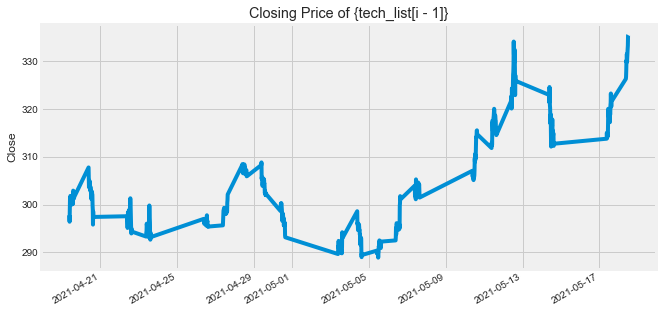

In [245]:
plt.figure(figsize=(18, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title("Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

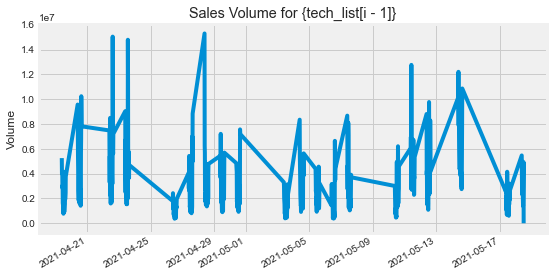

In [246]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title("Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

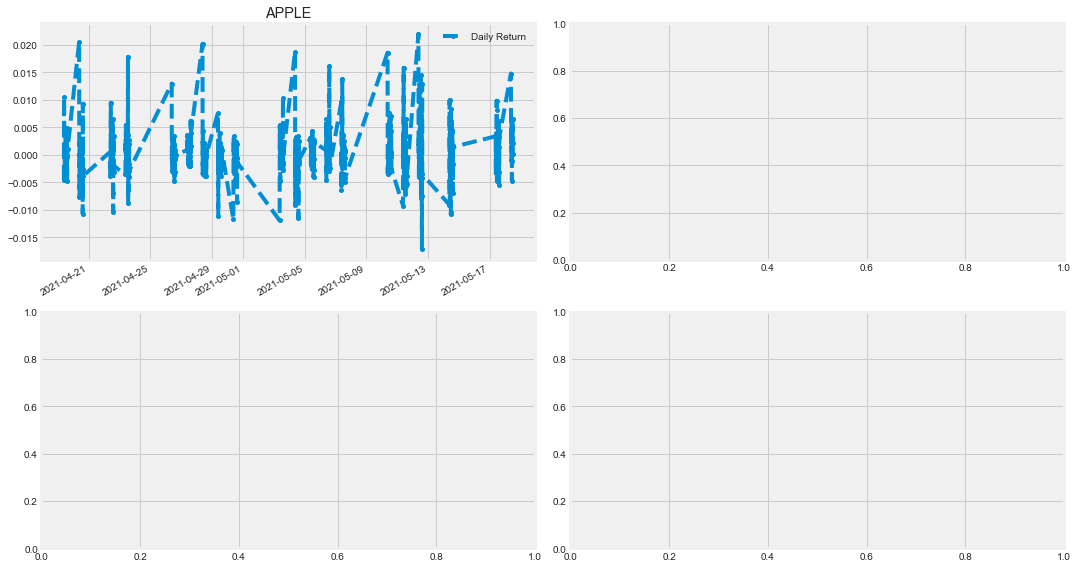

In [247]:
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TATA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')


fig.tight_layout()

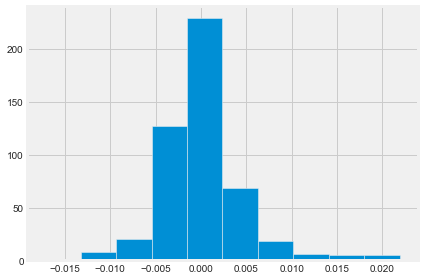

In [248]:
TATA['Daily Return'].hist()
plt.tight_layout()


In [249]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Close']

# Let's take a quick look
closing_df.head() 

Symbols,TATAMOTORS.NS
Date,
2020-05-18,80.650002
2020-05-19,81.800003
2020-05-20,83.449997
2020-05-21,84.099998
2020-05-22,82.800003


In [250]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,TATAMOTORS.NS
Date,
2020-05-18,NaN
2020-05-19,0.014259
2020-05-20,0.020171
2020-05-21,0.007789
2020-05-22,-0.015458


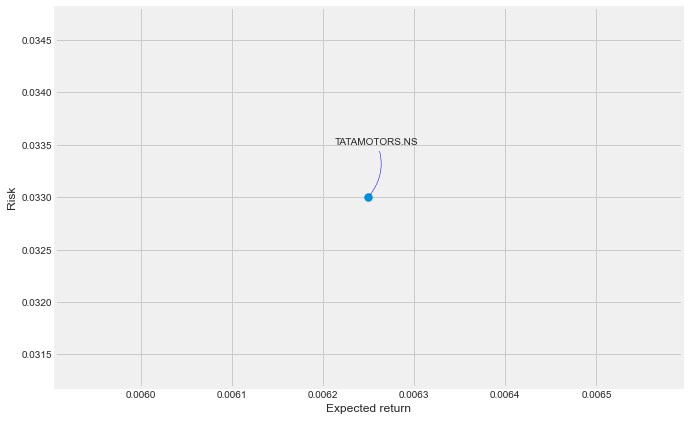

In [251]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [255]:
df = DataReader('TATAMOTORS.NS', data_source='yahoo', start='2012-01-01', end='2021-05-31')
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,183.086212,176.902542,179.029724,181.997894,10175802.0,176.739136
2012-01-03,192.732742,184.224014,184.273483,191.891769,15868503.0,186.347137
2012-01-04,200.351028,190.951843,191.792831,199.064835,22752471.0,193.312927
2012-01-05,203.566544,198.075439,198.817490,199.955276,21640778.0,194.177643
2012-01-06,202.824509,196.393478,197.877563,201.439362,13553191.0,195.618851
...,...,...,...,...,...,...
2021-05-11,320.750000,308.100006,309.549988,315.549988,58472304.0,315.549988
2021-05-12,334.750000,316.250000,318.250000,326.000000,111584920.0,326.000000
2021-05-14,329.500000,310.000000,329.350006,312.250000,81305325.0,312.250000


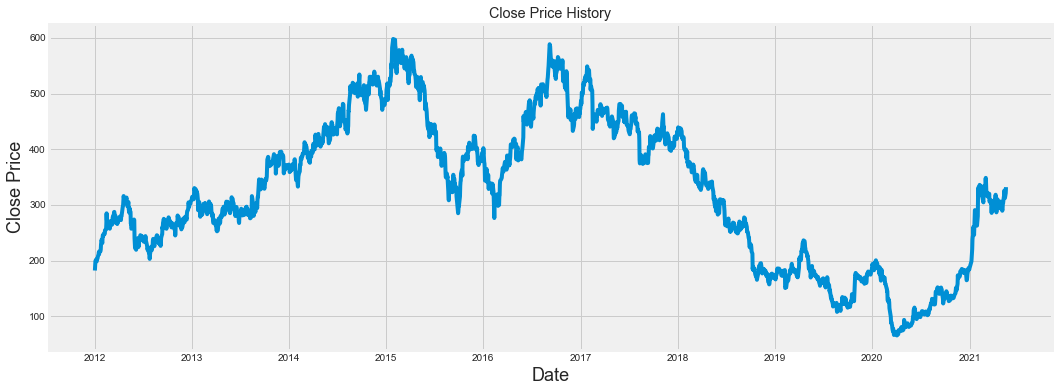

In [256]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [258]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2191

In [259]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.21901343],
       [0.23758182],
       [0.25104391],
       ...,
       [0.46346482],
       [0.48007412],
       [0.50024924]])

In [260]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.21901343, 0.23758182, 0.25104391, 0.25271505, 0.25550032,
       0.24992979, 0.25828558, 0.25791422, 0.26032809, 0.26515589,
       0.27434723, 0.2811247 , 0.27453291, 0.28307439, 0.28428133,
       0.28428133, 0.28957333, 0.30628487, 0.32281075, 0.31176256,
       0.33005242, 0.33868671, 0.33506587, 0.33729409, 0.34490713,
       0.34230755, 0.34277175, 0.35521259, 0.35530543, 0.35706941,
       0.37498794, 0.41193903, 0.38974981, 0.38612894, 0.38120836,
       0.37591635, 0.37591635, 0.37034582, 0.36013323, 0.38501485,
       0.38055847, 0.37359532, 0.37443089, 0.38650031, 0.3732239 ,
       0.37498794, 0.39856978, 0.40516157, 0.40293338, 0.4159312 ,
       0.41676683, 0.40980368, 0.40376895, 0.38139404, 0.39012117,
       0.37898011, 0.38380791, 0.37582351, 0.3839936 , 0.38092984])]
[0.3824152949176307]

[array([0.21901343, 0.23758182, 0.25104391, 0.25271505, 0.25550032,
       0.24992979, 0.25828558, 0.25791422, 0.26032809, 0.26515589,
       0.27434723, 0.2811247 , 0.274

In [261]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2131/2131 [==============================] - 87s 23ms/step - loss: 0.0052


In [262]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

14.911892305792012

<ipython-input-266-1eca4bcf2ab6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


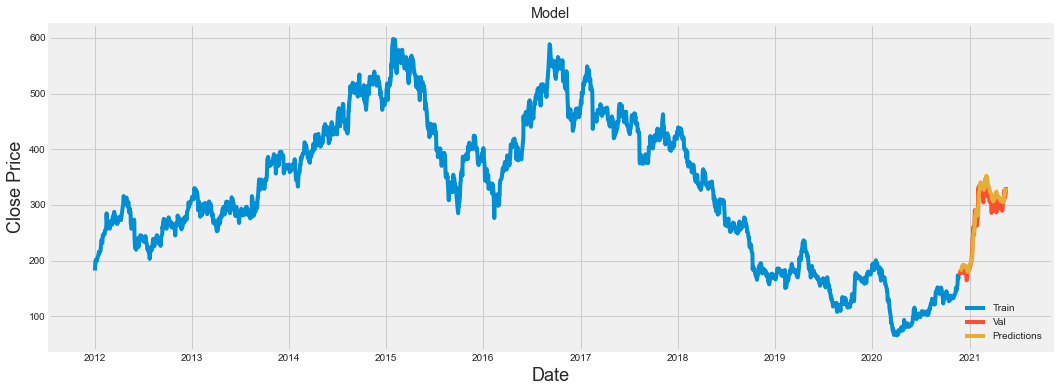

In [266]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [264]:
valid

,Close,Predictions
Date,,
2020-11-26,173.750000,180.491623
2020-11-27,180.350006,181.385315
2020-12-01,179.750000,183.329376
2020-12-02,183.600006,185.255280
2020-12-03,184.850006,187.587845
...,...,...
2021-05-11,315.549988,312.659454
2021-05-12,326.000000,318.060364
2021-05-14,312.250000,324.816681
